In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


This data has a total of 569 observations.
Each row in the dataset represents one patient, and the columns are the attributes observed in those patients. The following is an explanation of each feature:

**Feature 1-2:**
*   ID number
*   Diagnosis (M = malignant, B = benign)

**Feature 3-32:**

Ten real-valued features are computed for each cell nucleus:
*   radius (mean of distances from center to points on the perimeter)
*   texture (standard deviation of gray-scale values)
*   perimeter
*   area
*   smoothness (local variation in radius lengths)
*   compactness (perimeter^2 / area - 1.0)
*   concavity (severity of concave portions of the contour)
*   concave points (number of concave portions of the contour)
*   symmetry
*   fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#**Preprocssing Data**

**Drop Unnecessary Column**

In [ ]:
data = data.drop(['id','Unnamed: 32'], axis=1)

**Handling Missing Value**

In [ ]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Based on the output above, it can be concluded that there are no missing values in the data.

**Find and Handling Duplicated Data**

In [ ]:
data.duplicated().sum()

0

Based on the output above, it can be concluded that there is no duplicate data.

**Encoding Column Target Namely "diagnosis"**

In [ ]:
from sklearn.preprocessing import LabelEncoder
# convert all non-numeric variables to numeric type
for column in data.columns:
    if data[column].dtype == np.number: continue
    # Perform Encoding for each non-numeric variables
    data[column] = LabelEncoder().fit_transform(data[column])

<ipython-input-198-ff328aba8197>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number: continue
<ipython-input-198-ff328aba8197>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number: continue


In [ ]:
data.dtypes.value_counts()

float64    30
int64       1
dtype: int64

In [ ]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Setelah diencoding maka kolom diagnosis berubah menjadi "1" dan "0" dimana **"1" mengkodekan M yaitu Malignant dan "0" mengkodekan "B" yaitu Benign**

In [ ]:
data.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

##**Exploratory Data Analysis**

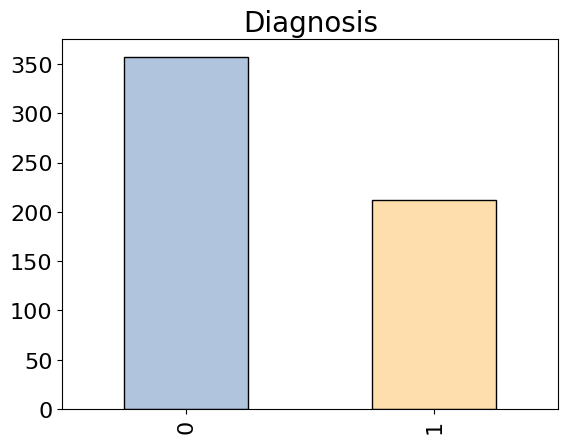

In [ ]:
data['diagnosis'].value_counts().plot(kind='bar',edgecolor='black',color=['lightsteelblue','navajowhite'])
plt.title("Diagnosis",fontsize=20)
plt.show()



*   0 -> Benign
*   1 -> Malignant

Bar plot di atas menunjukan bahwa jumlah Benign lebih banyak dibandingkan jumlah malignant.



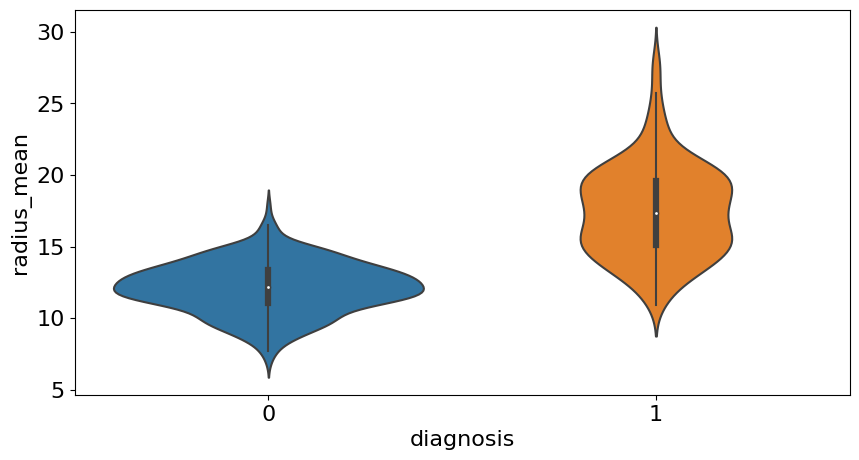

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x='diagnosis', y='radius_mean', data=data)
plt.show()



*   0 -> Benign
*   1 -> Malignant

Violin plot di atas dapat digunakan untuk melihat penyebaran data.



Menghitung rata-rata berdasarkan nilai 'diagnosis'

In [ ]:
mean_by_outcome = data.groupby('diagnosis').mean()

Menampilkan rata-rata untuk setiap variabel berdasarkan nilai 'diagnosis'

In [ ]:
mean_by_outcome

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


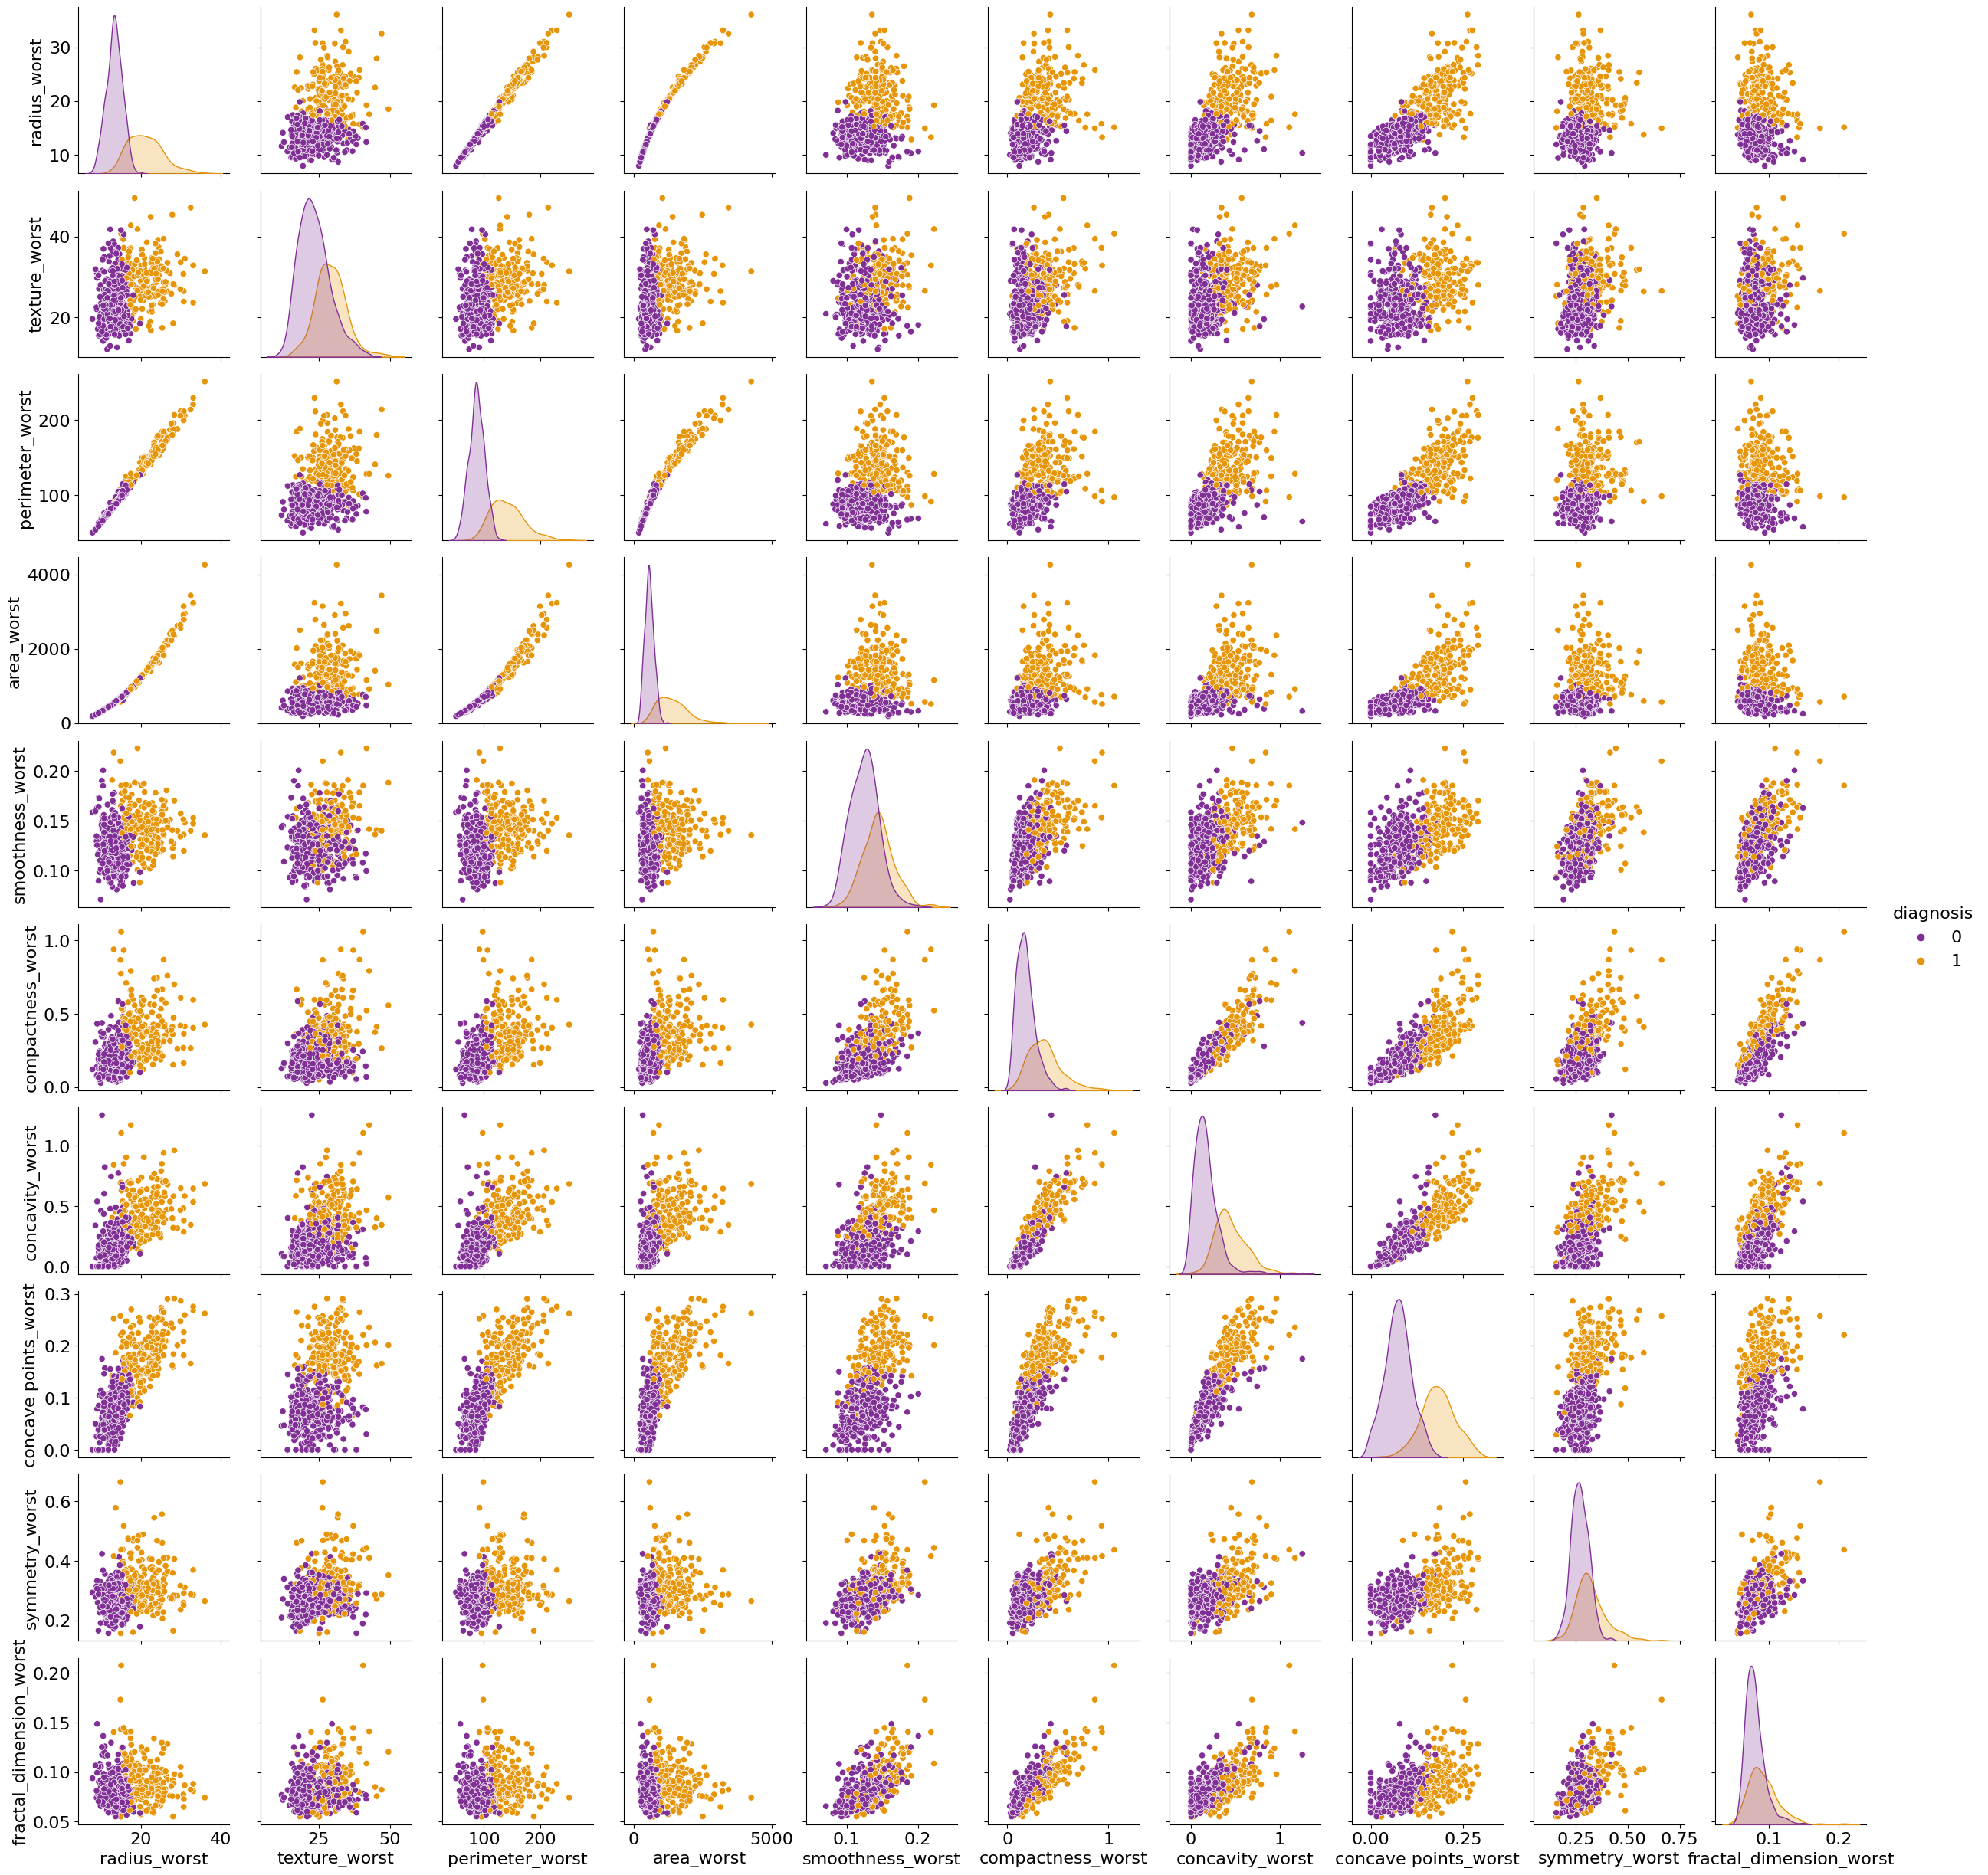

In [ ]:
worst_col = ['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

sns.pairplot(data[worst_col],hue = 'diagnosis', palette="CMRmap")

This code uses the `sns.pairplot` function from the Seaborn library to create a visualization of the relationship between multiple pairs of variables from a dataset called 'data'. The variables selected for analysis include 'diagnosis','radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'.

In `sns.pairplot`, this function creates a grid of scatter plots showing the relationship between pairs of variables. The dataset 'data' is used to create the pairplot, and the parameter 'vars' is used to specify the variables to be visualized. The use of the parameter 'hue='diagnosis'' aims to differentiate the data by assigning a color based on the value of the 'diagnosis' column, i.e. whether the patient has a benign or malignant tumor.

By using pairplot and splitting the color based on 'diagnosis', each scatter plot in the grid will show the relationship between the two variables with the points colored differently, depending on whether the patient has a benign or malignant tumor. This helps to identify patterns or trends that may exist in the relationship between variables and how they relate to the presence of tumor types in the dataset.

##**Feature Selection**

In [ ]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-206-96612fe94b20>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.00,0.73,0.42,0.74,0.71,0.36,0.60,0.70,0.78,0.33,-0.01,0.57,-0.01,0.56,0.55,-0.07,0.29,0.25,0.41,-0.01,0.08,0.78,0.46,0.78,0.73,0.42,0.59,0.66,0.79,0.42,0.32
radius_mean,0.73,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,0.68,-0.10,0.67,0.74,-0.22,0.21,0.19,0.38,-0.10,-0.04,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
texture_mean,0.42,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08,0.28,0.39,0.28,0.26,0.01,0.19,0.14,0.16,0.01,0.05,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
perimeter_mean,0.74,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,0.69,-0.09,0.69,0.74,-0.20,0.25,0.23,0.41,-0.08,-0.01,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
area_mean,0.71,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28,0.73,-0.07,0.73,0.80,-0.17,0.21,0.21,0.37,-0.07,-0.02,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
smoothness_mean,0.36,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58,0.30,0.07,0.30,0.25,0.33,0.32,0.25,0.38,0.20,0.28,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
compactness_mean,0.60,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,0.57,0.50,0.05,0.55,0.46,0.14,0.74,0.57,0.64,0.23,0.51,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity_mean,0.70,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,0.34,0.63,0.08,0.66,0.62,0.10,0.67,0.69,0.68,0.18,0.45,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave points_mean,0.78,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,0.17,0.70,0.02,0.71,0.69,0.03,0.49,0.44,0.62,0.10,0.26,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
symmetry_mean,0.33,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,0.48,0.30,0.13,0.31,0.22,0.19,0.42,0.34,0.39,0.45,0.33,0.19,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44


In [ ]:
correlation_with_diagnosis = data.corr()['diagnosis'].sort_values(ascending=False)
correlation_with_diagnosis

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

Based on the correlation above, there are several features that have a negative correlation with "diagnosis" (fractal_dimension_mean, texture_se, smoothness_se, symmetry_se) these features are considered to have no effect on "diagnosis" so they can be dropped.

In [ ]:
data = data.drop(['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se'], axis=1)

In [ ]:
data.shape

(569, 27)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  radius_se                569 non-null    float64
 11  perimeter_se             569 non-null    float64
 12  area_se                  569 non-null    float64
 13  compactness_se           569 non-null    float64
 14  concavity_se             5

In [ ]:
data.shape

(569, 27)

##**Data Split**

In [ ]:
X=data.drop(['diagnosis'], axis=1)
y=data['diagnosis']

Separates the target column i.e. the 'diagnosis' column from the dataset.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.model_selection import train_test_split: This is the line that imports the train_test_split function from the Scikit-Learn library. This function allows to easily split the dataset into training and testing parts.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0): This is the train_test_split function call. The parameters used are as follows:

X: A variable that contains the features or attributes of the dataset (remember X is large).


y: Is a variable that contains the target or label of the dataset. (remember y is small)


test_size=0.2: This parameter specifies the proportion of the dataset that will be allocated for testing. In this example, 0.2 means 20% of the data will be the testing data.


random_state=0: This parameter specifies the seed or initial value for the random number generator used in data sharing. This is useful to ensure that the data sharing is consistently reproducible. If this value is fixed, the data split will be the same every time the code is run.

In [ ]:
print(X_train.shape)
print(X_test.shape)

(455, 26)
(114, 26)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(455,)
(114,)


In [ ]:
from sklearn import StandarsScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

Scales the features in both the training and test datasets using the StandardScaler in scikit-learn.

In [ ]:
X_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [ ]:
X_test

array([[-0.22609091,  0.14299357, -0.16219992, ...,  1.33438591,
         1.22101459,  1.32977555],
       [-0.28072076,  1.13113906, -0.34954245, ..., -0.81952682,
        -0.77541863, -0.94570364],
       [-0.04782508, -0.87231025, -0.12299829, ..., -0.49120548,
        -1.31433312, -0.98696059],
       ...,
       [ 1.7233322 , -0.06173848,  1.70132185, ...,  1.51554921,
         0.25341812, -0.26496405],
       [ 1.18565945,  0.15552818,  1.16487847, ...,  0.53103066,
         0.32690646, -0.37709831],
       [ 0.24545096, -0.64668718,  0.25416267, ..., -0.19956228,
        -1.2425945 , -0.01424877]])

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

##**Create a Model with ANN**

In [ ]:
#ANN Design : 26 - 16 - 16 - 1
#Input
ann_model = Sequential()

#1st Hidden Layer
ann_model.add(Dense(16, kernel_initializer='uniform', activation='relu', input_dim = 26))

#2nd Hidden Layer
ann_model.add(Dense(16, kernel_initializer='uniform', activation='relu'))

#Output Layer
ann_model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid')) #classify

In [ ]:
#Compile the model

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# train the model
ann_model.fit(X_train, y_train, batch_size=100, epochs=150, validation_split=0.2)

Epoch 1/150
4/4 [==============================] - 1s 67ms/step - loss: 0.6927 - accuracy: 0.6291 - val_loss: 0.6921 - val_accuracy: 0.6044
Epoch 2/150
4/4 [==============================] - 0s 13ms/step - loss: 0.6913 - accuracy: 0.6456 - val_loss: 0.6907 - val_accuracy: 0.6044
Epoch 3/150
4/4 [==============================] - 0s 13ms/step - loss: 0.6896 - accuracy: 0.6456 - val_loss: 0.6888 - val_accuracy: 0.6044
Epoch 4/150
4/4 [==============================] - 0s 12ms/step - loss: 0.6872 - accuracy: 0.6456 - val_loss: 0.6862 - val_accuracy: 0.6154
Epoch 5/150
4/4 [==============================] - 0s 12ms/step - loss: 0.6838 - accuracy: 0.6484 - val_loss: 0.6824 - val_accuracy: 0.6374
Epoch 6/150
4/4 [==============================] - 0s 12ms/step - loss: 0.6792 - accuracy: 0.6758 - val_loss: 0.6772 - val_accuracy: 0.6923
Epoch 7/150
4/4 [==============================] - 0s 13ms/step - loss: 0.6728 - accuracy: 0.7418 - val_loss: 0.6701 - val_accuracy: 0.8022
Epoch 8/150
4/4 [===

In [ ]:
# Testing ANN Model
#seperating as class 0 and 1 as per sigmoid function
y_pred = ann_model.predict(X_test)
y_pred = (y_pred > 0.5)

4/4 [==============================] - 0s 3ms/step


In [ ]:
loss, accuracy = ann_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.1027 - accuracy: 0.9649


In [ ]:
print(f'Loss in the ANN Model design : {loss:.4f}')
print(f'Accuracy in the ANN Model design : {accuracy*100:.4f}')

Loss in the ANN Model design : 0.1027
Accuracy in the ANN Model design : 96.4912


Model has an accuracy of 96.49%

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[66,  1],
       [ 3, 44]])

<Axes: >

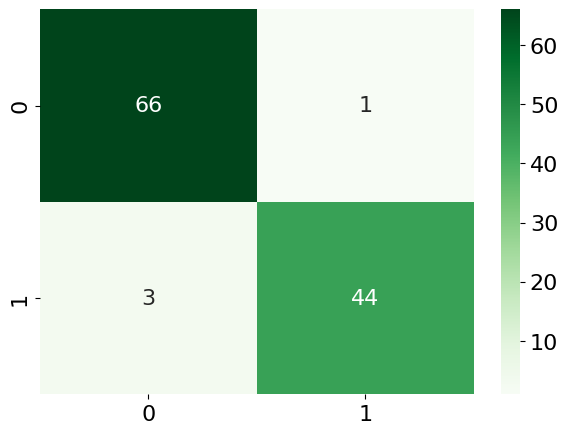

In [ ]:
#HeatMap for Confusion Matrix
plt.figure(figsize=(7,5))
plt.rcParams.update({'font.size': 16})
sns.heatmap(cm,annot=True,cmap='Greens')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

print(f"True Positive (TP): {TP}")
print(f"False Positive (FP): {FP}")
print(f"True Negative (TN): {TN}")
print(f"False Negative (FN): {FN}")


True Positive (TP): 44
False Positive (FP): 1
True Negative (TN): 66
False Negative (FN): 3


In [ ]:
y_pred_1 = ann_model.predict(X_test)

# AUC score for the binary classification problem
auc_score = roc_auc_score(y_test, y_pred_1)

print("AUC Score:", auc_score)

4/4 [==============================] - 0s 3ms/step
AUC Score: 0.9920609717370594


The AUC (Area Under the Curve) Score of 0.9920609717370594 is the result of evaluating the performance of the classification model. An AUC of 0.9920609717370594 indicates that the area under the ROC curve (which describes the ratio between true positive rate and false positive rate at various thresholds) reaches a very high value, close to the perfect area (1.0). This indicates that the model has a very good ability to distinguish between positive and negative classes, and in general, the model can be considered to perform very well in the given classification task.

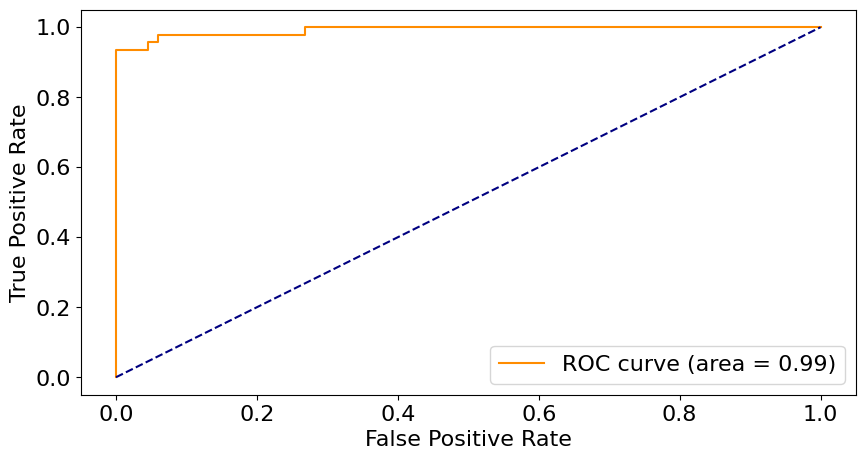

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()